# Final Project - Kalkulator Pajak - Saudi (SAR)

## Import Libraries

In [1]:
# Melakukan import libraries yang akan digunakan
import pandas as pd
import numpy as np
# Library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Library untuk korelasi
from scipy import stats
# Library untuk model ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
# Library untuk model LINREG
from sklearn.linear_model import LinearRegression
# Library untuk model LSTM
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow as tf
import numpy as np
from tensorflow.keras.regularizers import L2
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, LSTM, Dropout
# Library untuk model saving
import pickle
# Library untuk model inference
from datetime import datetime
# Library untuk evaluasi
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
# Library untuk handling warning
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
# Melakukan loading data currency
df_sar = pd.read_csv('SAR-2001.csv')
# Menampilkan hasil data
df_sar

,Date,Close
0,12/1/2003 23:58:00,2266.360790
1,12/2/2003 23:58:00,2263.080615
2,12/3/2003 23:58:00,2258.227023
3,12/4/2003 23:58:00,2264.787373
4,12/5/2003 23:58:00,2258.547040
...,...,...
6431,4/30/2024 23:58:00,4336.122875
6432,5/1/2024 23:58:00,4321.596127
6433,5/2/2024 23:58:00,4293.932715
6434,5/3/2024 23:58:00,4257.706855


In [3]:
# Menampilkan 10 data awal tabel dengan head
df_sar.head(10)

,Date,Close
0,12/1/2003 23:58:00,2266.360790
1,12/2/2003 23:58:00,2263.080615
2,12/3/2003 23:58:00,2258.227023
3,12/4/2003 23:58:00,2264.787373
4,12/5/2003 23:58:00,2258.547040
5,12/8/2003 23:58:00,2264.840709
6,12/9/2003 23:58:00,2259.933781
7,12/10/2003 23:58:00,2267.374177
8,12/11/2003 23:58:00,2251.373325
9,12/12/2003 23:58:00,2259.220723


In [4]:
# Menampilkan 10 data akhir data menggunakan tail
df_sar.tail(10)

,Date,Close
6426,4/25/2024 23:58:00,4321.589284
6427,4/26/2024 23:58:00,4330.379327
6428,4/27/2024 23:58:00,4330.494802
6429,4/28/2024 23:58:00,4322.149135
6430,4/29/2024 23:58:00,4334.585379
6431,4/30/2024 23:58:00,4336.122875
6432,5/1/2024 23:58:00,4321.596127
6433,5/2/2024 23:58:00,4293.932715
6434,5/3/2024 23:58:00,4257.706855
6435,5/4/2024 23:58:00,4257.621741


## Exploratory Data Analysis

### Data Understanding

In [5]:
# Melihat kolom yang tersedia
df_sar.columns

Index(['Date', 'Close'], dtype='object')

In [6]:
# Melihat tipe data yang tersedia
df_sar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6436 non-null   object 
 1   Close   6436 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [7]:
# Melihat jumlah data yang tersedia
df_sar.shape

(6436, 2)

In [8]:
# Mengecek central tendency menggunakan describe
df_sar.describe()

,Close
count,6436.000000
mean,3194.874074
std,654.580796
min,2201.909472
25%,2491.253679
50%,3351.953694
75%,3800.330574
max,4424.683530


In [9]:
# Mengecek duplikasi pada data
df_sar.duplicated().value_counts()

False    6436
Name: count, dtype: int64

In [10]:
# Mengecek nilai null
df_sar.isnull().sum()

Date     0
Close    0
dtype: int64

### Data Visualization

Text(0, 0.5, 'Currency Price')

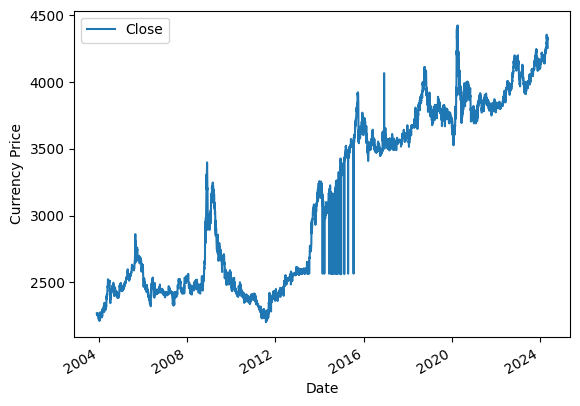

In [11]:
# Plot the data

df_sar.columns = ['Date', 'Close']
df_sar.Date = pd.to_datetime(df_sar.Date)
df_sar.set_index('Date',inplace=True)
df_sar.plot()
plt.xlabel('Date')
plt.ylabel('Currency Price')

## Feature Engineering


In [12]:
#splitting train and test
train=df_sar[:4000]
test=df_sar[4000:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (4000, 1)
Test size :  (2436, 1)


## Model Definition & Training

### Moving Average

In [13]:
# Membuat hasil prediksi dengan rolling window 12 hari
predictions = []

window_size = 12
for i in range(len(test)):
    if i < window_size:
        moving_avg = train['Close'].mean()
    else:
        moving_avg = train['Close'].iloc[-window_size:].mean()

    predictions.append(moving_avg)

    train = pd.concat([train, test.iloc[[i]]], ignore_index=True)

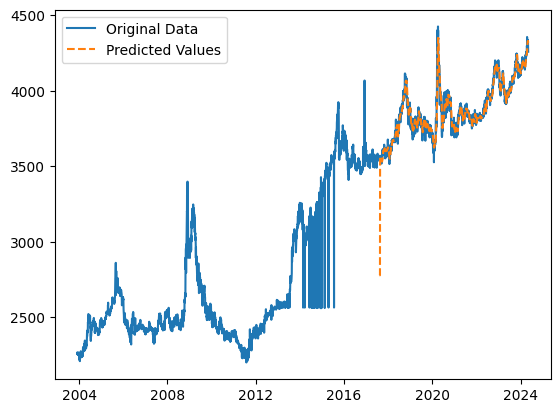

In [14]:
# Melakukan visualisasi plot data
plt.plot(df_sar['Close'], label='Original Data')
plt.plot(test.index, predictions, label='Predicted Values', linestyle='--')
plt.legend()
plt.show()

In [15]:
# Melihat hasil prediksi
print(predictions)

[2777.0550092172502, 2777.2479875213694, 2777.4421929277864, 2777.635795881089, 2777.8305645394603, 2778.025350009488, 2778.2214806248126, 2778.4176465957075, 2778.6127423682633, 2778.8079949792964, 2779.004091398753, 2779.1997526382447, 3559.987101416666, 3561.337491083333, 3562.179751916666, 3562.937113333334, 3563.305848, 3563.2534352499993, 3563.2820751666663, 3562.8657937499997, 3562.9126201666663, 3562.8745335000003, 3562.2163352499997, 3561.2023812499997, 3560.3347891666667, 3559.8563968333333, 3559.13969675, 3558.9276081666662, 3558.7274106666664, 3558.5287294166665, 3558.58115525, 3558.5653223333334, 3558.5604420833333, 3557.47483675, 3554.5852855, 3552.119779, 3548.7968143333333, 3545.2662027500005, 3542.7524775, 3540.7518509999995, 3539.14377525, 3537.262734666667, 3534.701352666667, 3533.27119875, 3531.4405263333333, 3531.045132333333, 3532.7592810833326, 3534.8171897499997, 3537.25531975, 3540.4522331666667, 3544.1989845000003, 3548.447961083333, 3553.9203188333336, 3557.1

In [16]:
# Melakukan evaluasi
print("MAE :", mean_absolute_error(test.Close, predictions))
print("RMSE :", sqrt(mean_squared_error(test.Close, predictions)))

MAE : 27.42623891634446
RMSE : 65.67819916594496


### ARIMA

#### Checking Stationary

In [17]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [18]:
# Check stationarity of the dataset

check_stationarity(df_sar['Close'])

ADF Statistic: -0.903996
p-value: 0.786654
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


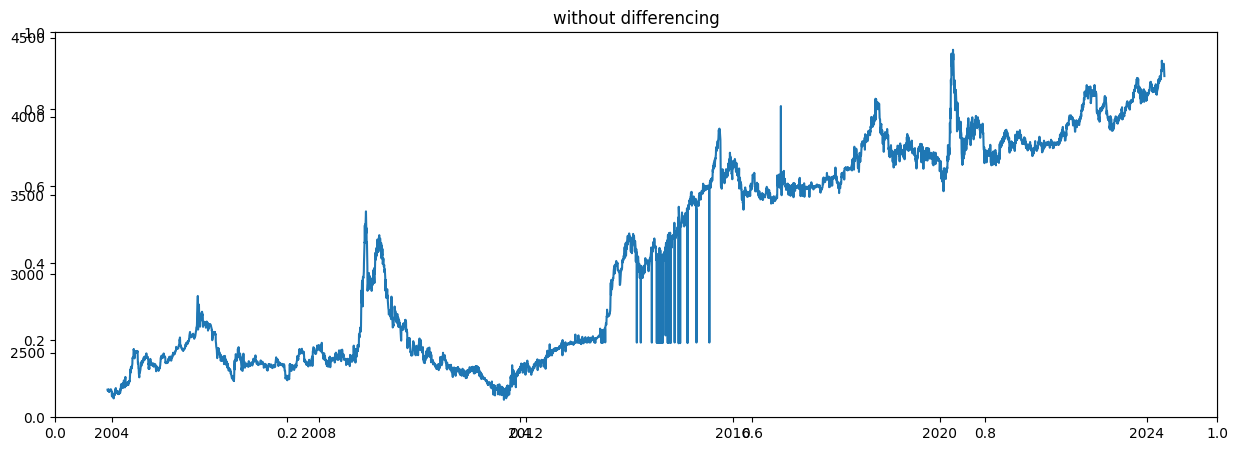

In [19]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(df_sar['Close'])

In [20]:
# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(df_sar['Close'].diff().dropna())

1st order differencing
ADF Statistic: -14.914184
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


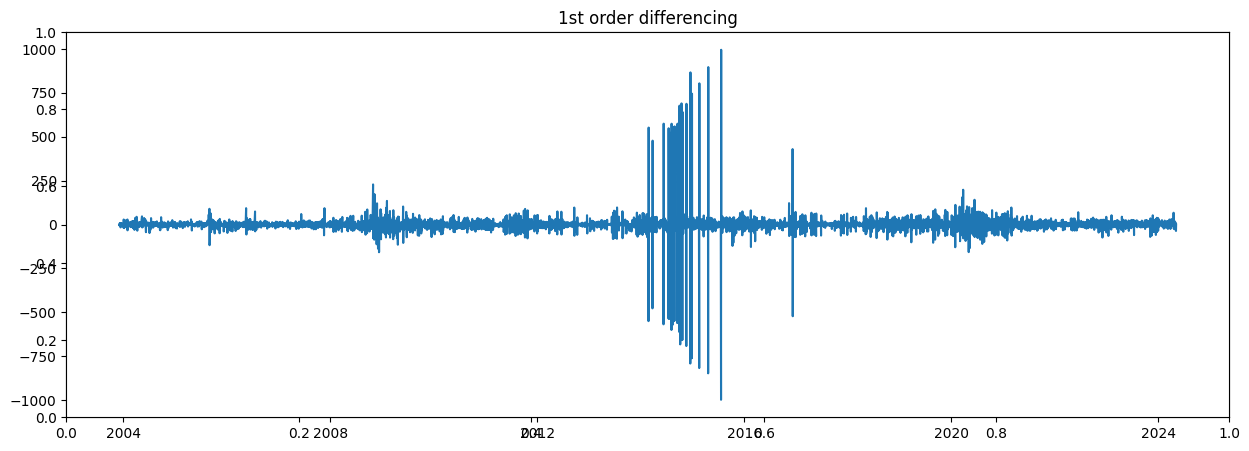

In [21]:
# Plot the result after first-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(df_sar['Close'].diff())

#### ACF & PACF

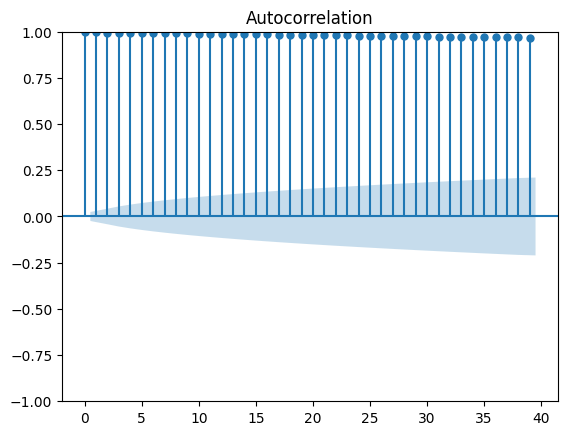

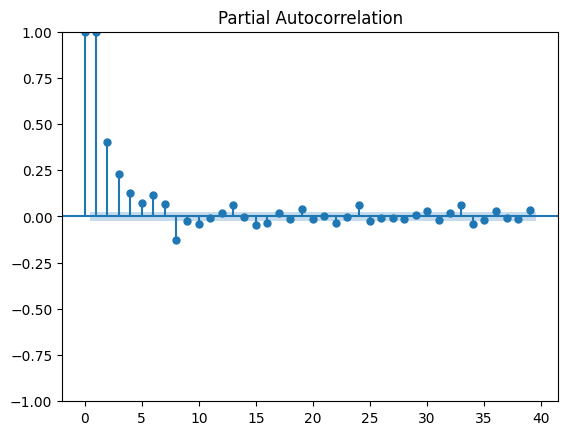

In [22]:
# Plot ACF & PACF from the original dataset

plot_acf(df_sar['Close'])
plot_pacf(df_sar['Close'])
plt.show()

Karena ini merupakan plot pada data yang belum dilakukan differencing, maka lihat juga untuk plot yang sudah dilakukan differencing sampai stasioner.

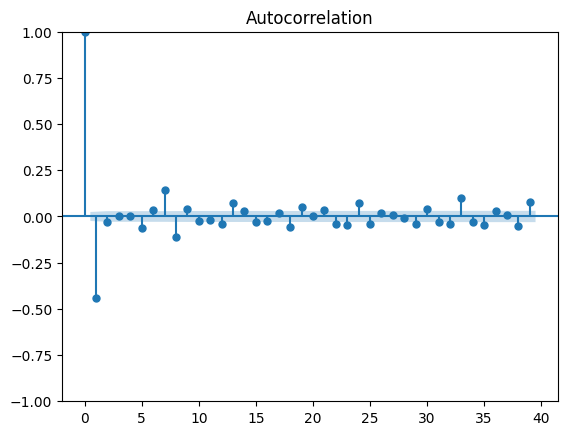

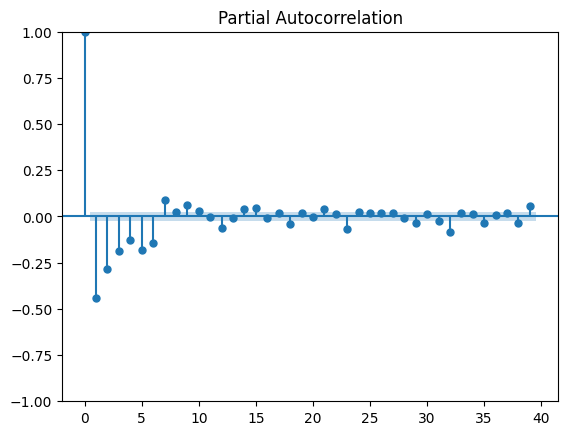

In [23]:
# Plot ACF & PACF for differencing the original dataset

plot_acf(df_sar['Close'].diff().dropna())
plot_pacf(df_sar['Close'].diff().dropna())
plt.show()

Dari hasil plot, dapat terlihat bahwa rekomendasi untuk pembuatan model ARIMA adalah sebagai berikut.
- p (Partial Autocorrelation) = 1,2 (batas lag 0.25 & -0.25)
- d = 1 (dikarenakan data stasioner pada diferensiasi 1)
- q (Autocorrelation) = 1 (batas lag 0.25 & -0.25)

Dari beberapa pilihan tersebut, kita akan lakukan pencarian model ARIMA terbaik.

#### ARIMA Model

In [24]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [25]:
# Find best model of ARIMA with combinations of p=2, d=1, q=1

%%time
find_best_model(df_sar['Close'], 2, 1, 1)

CPU times: user 17.4 s, sys: 9.48 s, total: 26.9 s
Wall time: 33.6 s


(2,
 1,
 1,
 68271.78123617172,
     p  d  q            AIC
 11  2  1  1   68271.781236
 7   1  1  1   68276.594810
 3   0  1  1   68277.102771
 9   2  0  1   68296.673281
 5   1  0  1   68297.649934
 10  2  1  0   68749.652552
 6   1  1  0   69282.745682
 8   2  0  0   69298.790577
 2   0  1  0   70687.474805
 4   1  0  0   70695.594691
 1   0  0  1   93756.790507
 0   0  0  0  101729.565049)

Dari hasil, kita dapat melihat bahwa model terbaik dengan kombinasi
- p = 2
- d = 1
- q = 1

Kita akan gunakan kombinasi ini untuk membuat model ARIMA.

In [26]:
# Train ARIMA with best combinations

model_arima_211 = ARIMA(df_sar['Close'], order=(2, 1, 1))
result_model_arima_211 = model_arima_211.fit()

print('The AIC is ', result_model_arima_211.aic)

The AIC is  68271.78123617172


In [27]:
# Prediksi model pada data
new_pred1 = result_model_arima_211.predict(start="2003-12-01", end="2024-05-04")
new_pred1 = pd.DataFrame(new_pred1)
new_pred1.columns = ['Close_predict']

all_dataset_with_pred1 = pd.concat([df_sar, new_pred1], axis=1)
all_dataset_with_pred1

,Close,Close_predict
Date,,
2003-12-01 23:58:00,2266.360790,0.000000
2003-12-02 23:58:00,2263.080615,2262.906393
2003-12-03 23:58:00,2258.227023,2262.666603
2003-12-04 23:58:00,2264.787373,2260.917719
2003-12-05 23:58:00,2258.547040,2262.554374
...,...,...
2024-04-30 23:58:00,4336.122875,4328.405735
2024-05-01 23:58:00,4321.596127,4330.382499
2024-05-02 23:58:00,4293.932715,4327.437294


In [28]:
# Melakukan forecasting pada data
len_dataset = df_sar.shape[0]
len_predict = len_dataset + 12


new_pred = result_model_arima_211.predict(len_dataset, len_predict)
new_pred = pd.DataFrame(new_pred)
new_pred.columns = ['Close_forecast']

last_date = df_sar.index.max()
date_range = pd.date_range(start=last_date, periods=13)
new_pred.index = date_range

# Menggabungkan prediksi dengan dataset asli
all_dataset_with_pred = pd.concat([all_dataset_with_pred1, new_pred], axis=1)
all_dataset_with_pred

,Close,Close_predict,Close_forecast
2003-12-01 23:58:00,2266.360790,0.000000,NaN
2003-12-02 23:58:00,2263.080615,2262.906393,NaN
2003-12-03 23:58:00,2258.227023,2262.666603,NaN
2003-12-04 23:58:00,2264.787373,2260.917719,NaN
2003-12-05 23:58:00,2258.547040,2262.554374,NaN
...,...,...,...
2024-05-12 23:58:00,NaN,NaN,4286.032681
2024-05-13 23:58:00,NaN,NaN,4286.032682
2024-05-14 23:58:00,NaN,NaN,4286.032678
2024-05-15 23:58:00,NaN,NaN,4286.032678


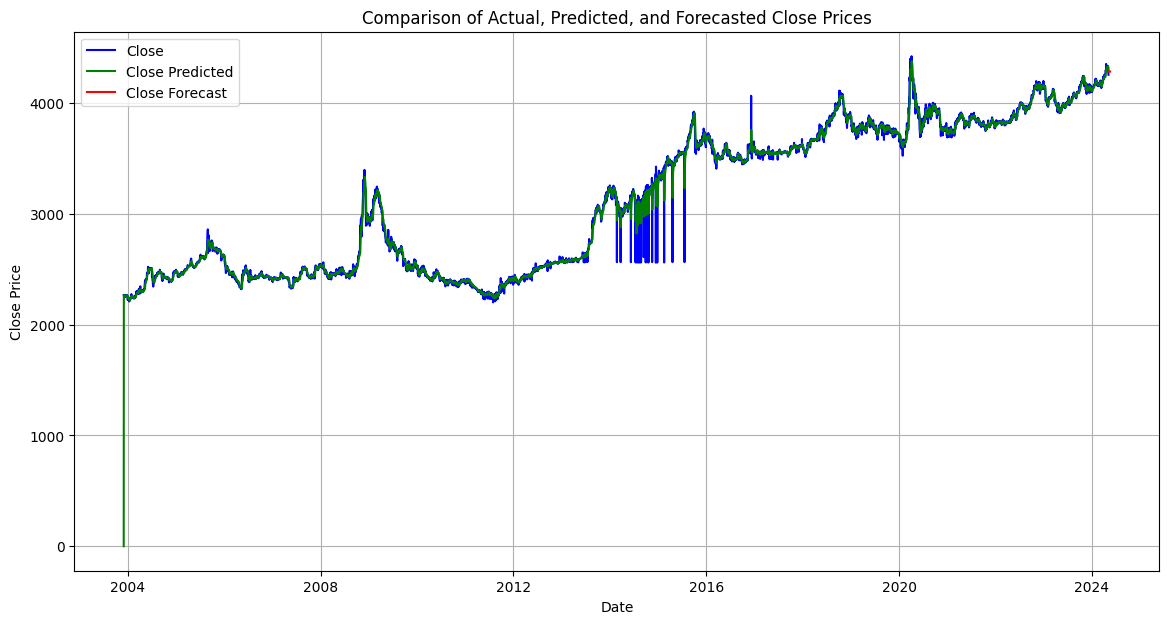

In [29]:
# Melakukan visualisasi data
plt.figure(figsize=(14, 7))
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close'], label='Close', color='blue', linestyle='-')  # Data asli
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_predict'], label='Close Predicted', color='green', linestyle='-')  # Data prediksi
plt.plot(all_dataset_with_pred.index, all_dataset_with_pred['Close_forecast'], label='Close Forecast', color='red', linestyle='-')  # Data forecast

plt.title('Comparison of Actual, Predicted, and Forecasted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
valid_data = all_dataset_with_pred.dropna(subset=['Close', 'Close_predict'])
valid_data

,Close,Close_predict,Close_forecast
2003-12-01 23:58:00,2266.360790,0.000000,NaN
2003-12-02 23:58:00,2263.080615,2262.906393,NaN
2003-12-03 23:58:00,2258.227023,2262.666603,NaN
2003-12-04 23:58:00,2264.787373,2260.917719,NaN
2003-12-05 23:58:00,2258.547040,2262.554374,NaN
...,...,...,...
2024-04-30 23:58:00,4336.122875,4328.405735,NaN
2024-05-01 23:58:00,4321.596127,4330.382499,NaN
2024-05-02 23:58:00,4293.932715,4327.437294,NaN
2024-05-03 23:58:00,4257.706855,4317.140276,NaN


In [31]:
print('MAE : ', mean_absolute_error(valid_data['Close'], valid_data['Close_predict']))
print('RMSE : ', np.sqrt(mean_squared_error(valid_data['Close'], valid_data['Close_predict'])))

MAE :  20.42383997606278
RMSE :  56.27350228447393


### Regression

#### Creating Dataset
Data akan menggunakan lag untuk menjadi fitur. Lag yang digunakan rekomendasi berada pada kisaran 3-6 lag.

In [32]:
df_sar.head(10)

,Close
Date,
2003-12-01 23:58:00,2266.360790
2003-12-02 23:58:00,2263.080615
2003-12-03 23:58:00,2258.227023
2003-12-04 23:58:00,2264.787373
2003-12-05 23:58:00,2258.547040
2003-12-08 23:58:00,2264.840709
2003-12-09 23:58:00,2259.933781
2003-12-10 23:58:00,2267.374177
2003-12-11 23:58:00,2251.373325


In [33]:
# Membuat dataset menggunakan lag
df_reg = df_sar.copy()
df_reg = df_reg.drop(['Close'], axis=1)
df_reg['lag_5'] = df_sar['Close'].shift(5)
df_reg['lag_4'] = df_sar['Close'].shift(4)
df_reg['lag_3'] = df_sar['Close'].shift(3)
df_reg['lag_2'] = df_sar['Close'].shift(2)
df_reg['lag_1'] = df_sar['Close'].shift(1)
df_reg['y'] = df_sar['Close']

# Menampilkan dataset
df_reg

,lag_5,lag_4,lag_3,lag_2,lag_1,y
Date,,,,,,
2003-12-01 23:58:00,NaN,NaN,NaN,NaN,NaN,2266.360790
2003-12-02 23:58:00,NaN,NaN,NaN,NaN,2266.360790,2263.080615
2003-12-03 23:58:00,NaN,NaN,NaN,2266.360790,2263.080615,2258.227023
2003-12-04 23:58:00,NaN,NaN,2266.360790,2263.080615,2258.227023,2264.787373
2003-12-05 23:58:00,NaN,2266.360790,2263.080615,2258.227023,2264.787373,2258.547040
...,...,...,...,...,...,...
2024-04-30 23:58:00,4321.589284,4330.379327,4330.494802,4322.149135,4334.585379,4336.122875
2024-05-01 23:58:00,4330.379327,4330.494802,4322.149135,4334.585379,4336.122875,4321.596127
2024-05-02 23:58:00,4330.494802,4322.149135,4334.585379,4336.122875,4321.596127,4293.932715


#### Cleaning Data

In [34]:
# Melakukan pengecekan nilai null pada dataset
df_reg.isnull().sum()

lag_5    5
lag_4    4
lag_3    3
lag_2    2
lag_1    1
y        0
dtype: int64

In [35]:
# Melakukan dropping nilai null pada data
df_reg.dropna(inplace=True)

# Mengecek hasil dropping nilai null
df_reg.isnull().sum()

lag_5    0
lag_4    0
lag_3    0
lag_2    0
lag_1    0
y        0
dtype: int64

#### Visualizations

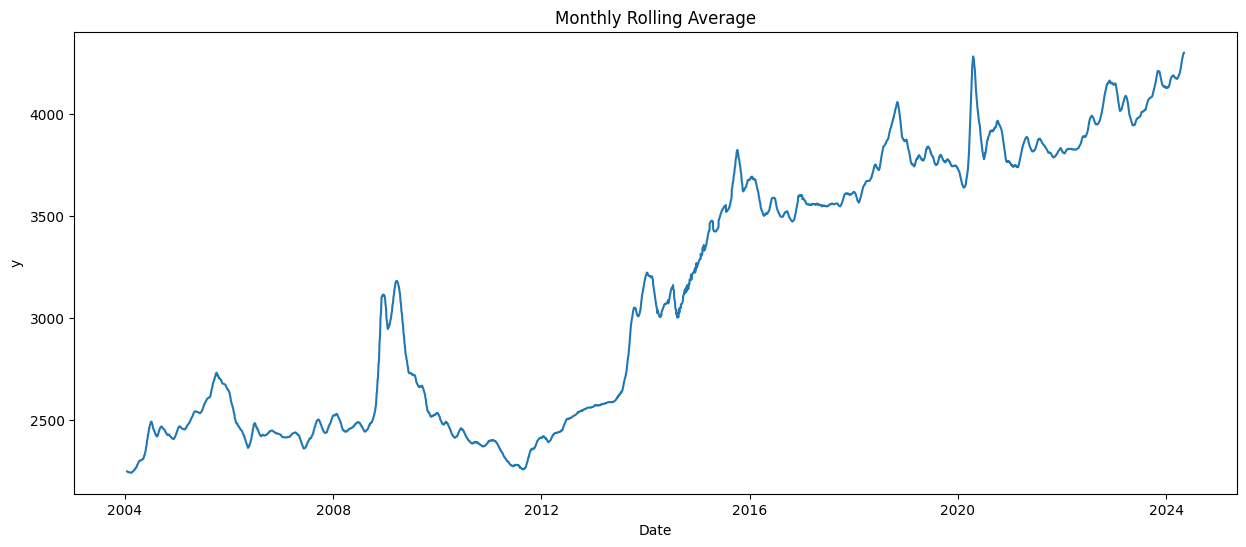

In [36]:
# Membuat visualisasi rolling per bulan
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = df_reg.index, y = df_reg["y"].rolling(30).mean(), data = df_reg, ax=ax)
ax.set_title("Monthly Rolling Average");

In [37]:
# Mengecek korelasi
df_reg.corr()

,lag_5,lag_4,lag_3,lag_2,lag_1,y
lag_5,1.000000,0.995964,0.995507,0.995297,0.995049,0.994796
lag_4,0.995964,1.000000,0.995965,0.995507,0.995296,0.995048
lag_3,0.995507,0.995965,1.000000,0.995965,0.995507,0.995296
lag_2,0.995297,0.995507,0.995965,1.000000,0.995965,0.995507
lag_1,0.995049,0.995296,0.995507,0.995965,1.000000,0.995966
y,0.994796,0.995048,0.995296,0.995507,0.995966,1.000000


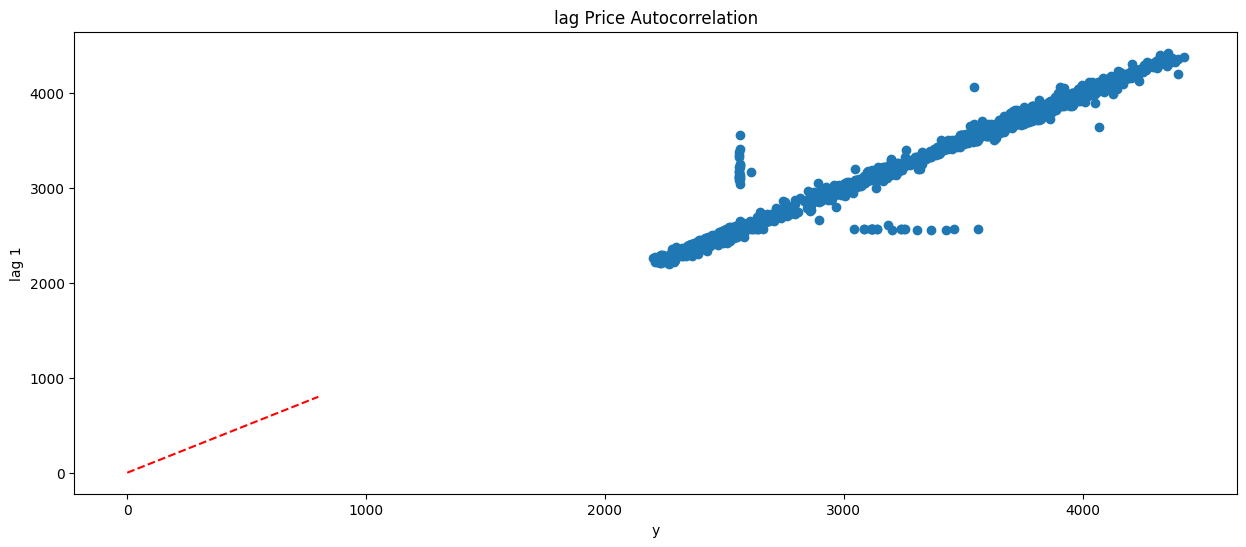

In [38]:
# Membuat visualisasi korelasi antara lag 0 dan lag 1
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x=df_reg["y"], y=df_reg["lag_1"])
ax.plot([0,800],[0,800],linestyle="--", color="red")
plt.xlabel("y")
plt.ylabel("lag 1")
plt.title("lag Price Autocorrelation");

#### Feature Engineering

In [39]:
# Split the data menjadi fitur dan target
target = "y"
y = df_reg[target]
X = df_reg.drop(columns= target)

#Split the data into train and test sets
cutoff = int(len(X) * 0.8)
X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

<Axes: xlabel='Date'>

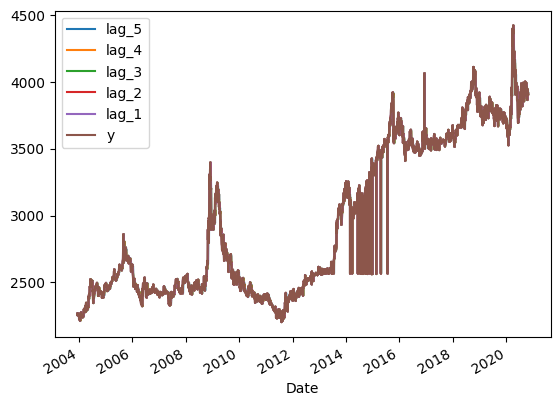

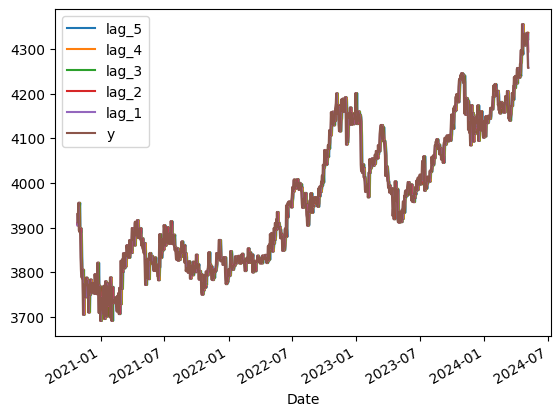

In [40]:
# Plotting data
df_reg[:len(X_train)].plot()
df_reg[len(X_train):].plot()

#### Model training

In [41]:
# Menentukan baseline MAE (persebaran nilai data)
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean Close Prices:", round(y_train.mean(), 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Close Prices: 3003.74
Baseline MAE: 546.74


In [42]:
# Melakukan modeling
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Melihat hasil nilai MAE training dan test
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 21.41
Test MAE: 13.58


In [44]:
# Membuat dataset perbandingan y_test dan y_pred
df_pred_test = pd.DataFrame(
             {
             "y_test": y_test,
             "y_pred": model.predict(X_test)
             }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2020-10-26 23:58:00,3930.415075,3907.001519
2020-10-27 23:58:00,3911.750797,3915.022898
2020-10-28 23:58:00,3944.530011,3913.249825
2020-10-29 23:58:00,3955.454684,3924.402770
2020-10-30 23:58:00,3893.427188,3934.660284


In [45]:
# Melakukan visualisasi data prediksi dengan data asli
fig = px.line(df_pred_test, labels= {"value": "Close Price"}, title = "Linear Regression Model: Actual Prices vs. Predicted Prices.")
fig.show()

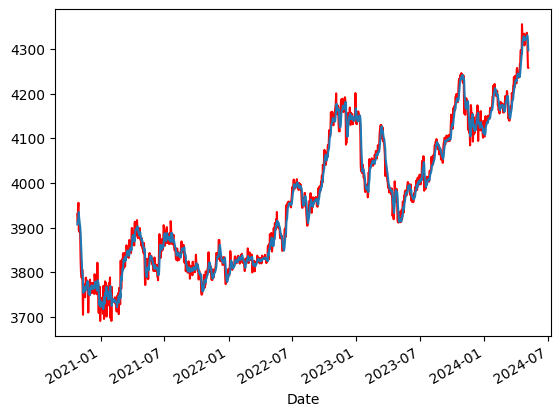

In [46]:
df_pred_test['y_test'].plot(color='red')
plt.plot(df_pred_test['y_pred'])

In [47]:
# Check the MAE & RMSE
print('MAE test  : ', mean_absolute_error(df_pred_test['y_test'], df_pred_test['y_pred']))
print('RMSE test : ', np.sqrt(mean_squared_error(df_pred_test['y_test'], df_pred_test['y_pred'])))

MAE test  :  13.583574699461208
RMSE test :  18.865974171639678


### LSTM

In [48]:
tf.random.set_seed(100)
tf.keras.backend.clear_session()

# Define the model_sar
model_sar = Sequential([
    LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1],1), kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, return_sequences=True, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    LSTM(units=128, kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=64, activation='relu', kernel_regularizer=L2(0.001)),
    Dropout(0.2),
    Dense(units=1, kernel_regularizer=L2(0.001))
])

model_sar.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Display model_sar summary
model_sar.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 5, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8

In [49]:
history_sar = model_sar.fit(X_train, y_train, epochs= 100, batch_size= 32)

Epoch 1/100
161/161 [==============================] - 11s 34ms/step - loss: 2874.4546 - mae: 2874.0405
Epoch 2/100
161/161 [==============================] - 5s 31ms/step - loss: 2274.1697 - mae: 2273.4353
Epoch 3/100
161/161 [==============================] - 4s 27ms/step - loss: 1149.5804 - mae: 1147.9912
Epoch 4/100
161/161 [==============================] - 6s 36ms/step - loss: 583.8862 - mae: 581.6538
Epoch 5/100
161/161 [==============================] - 5s 30ms/step - loss: 569.9021 - mae: 567.5941
Epoch 6/100
161/161 [==============================] - 4s 28ms/step - loss: 563.1566 - mae: 560.8394
Epoch 7/100
161/161 [==============================] - 6s 39ms/step - loss: 572.5635 - mae: 570.2602
Epoch 8/100
161/161 [==============================] - 5s 32ms/step - loss: 565.2982 - mae: 562.9861
Epoch 9/100
161/161 [==============================] - 7s 42ms/step - loss: 567.0646 - mae: 564.7636
Epoch 10/100
161/161 [==============================] - 4s 26ms/step - loss: 572.934

In [50]:
predictions_lstm = model_sar.predict(X_test)

41/41 [==============================] - 2s 10ms/step


In [52]:
print('MAE test  : ', mean_absolute_error(y_test, predictions_lstm))
print('RMSE test : ', np.sqrt(mean_squared_error(y_test, predictions_lstm)))

MAE test  :  1099.699129284892
RMSE test :  1110.3280424640081


## Model Evaluation

### Finding Best Model

In [53]:
# Membuat dictionary untuk menyimpan hasil MAE dan RMSE dari data

all_reports = {}
def performance_report(all_reports, y_test, y_pred_test, name):
  score_reports = {
      'MAE test' : mean_absolute_error(y_test, y_pred_test),
      'RMSE test' : np.sqrt(mean_squared_error(y_test, y_pred_test)),
  }
  all_reports[name] = score_reports
  return all_reports

In [54]:
# Menambahkan hasil Linear Regression ke dalam dictionary
all_reports = performance_report(all_reports, df_pred_test['y_test'], df_pred_test['y_pred'], 'Linear Regression')
pd.DataFrame(all_reports)

,Linear Regression
MAE test,13.583575
RMSE test,18.865974


In [55]:
# Menambahkan hasil Moving Average ke dalam dictionary
all_reports = performance_report(all_reports, test.Close, predictions, 'Moving Average')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average
MAE test,13.583575,27.426239
RMSE test,18.865974,65.678199


In [56]:
# Menambahkan hasil ARIMA ke dalam dictionary
all_reports = performance_report(all_reports, valid_data['Close'], valid_data['Close_predict'], 'ARIMA')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA
MAE test,13.583575,27.426239,20.423840
RMSE test,18.865974,65.678199,56.273502


In [57]:
# Menambahkan hasil LSTM ke dalam dictionary
all_reports = performance_report(all_reports, y_test, predictions_lstm, 'LSTM')
pd.DataFrame(all_reports)

,Linear Regression,Moving Average,ARIMA,LSTM
MAE test,13.583575,27.426239,20.423840,1099.699129
RMSE test,18.865974,65.678199,56.273502,1110.328042


Dari hasil perbandingan nilai MAE dan RMSE, didapatkan model linear regression memiliki hasil terbaik. Hasil linear regression akan dilakukan analisis lanjutan.

### Further Analysis
Dilakukan perbandingan min dan max dari test set dengan hasil prediksi.

In [58]:
# Melihat data hasil
hasil = df_pred_test.copy()
hasil.head()

,y_test,y_pred
Date,,
2020-10-26 23:58:00,3930.415075,3907.001519
2020-10-27 23:58:00,3911.750797,3915.022898
2020-10-28 23:58:00,3944.530011,3913.249825
2020-10-29 23:58:00,3955.454684,3924.402770
2020-10-30 23:58:00,3893.427188,3934.660284


In [59]:
# Melihat min dan max dari data menggunakan describe
hasil.describe()

,y_test,y_pred
count,1287.000000,1287.000000
mean,3962.439861,3961.076146
std,153.324672,151.880900
min,3690.940463,3717.471995
25%,3827.542924,3827.334314
50%,3952.571210,3951.376107
75%,4099.726802,4100.251533
max,4355.206986,4330.597092


Dari hasil didapatkan stat sebagai berikut.

| Stat | Prediksi | Nilai asli
| --- | --- | --- |
| Min | 3717.47 | 3690.94 |
| Max | 4330.6 | 4355.2 |
| Median | 3951.38 | 3952.57 |
| Mean | 3961.1 | 3962.44 |

Dapat terlihat bahwa terdapat beberapa insight : <br>
1. Hasil prediksi memiliki median dan mean yang cenderung relatif mirip dengan nilai asli.
2. Nilai prediksi memiliki batas minimum yang lebih tinggi namun memiliki nilai max yang lebih rendah dari nilai asli.

Untuk melihat jumlah data yang termasuk ke dalam kategori dapat dilakukan analisis lebih lanjut.

In [60]:
# Melakukan perhitungan jumlah data dimana y_pred < y_test
jum_lower_data = hasil[(hasil['y_pred']<hasil['y_test'])].count()
print(f"Jumlah data nilai prediksi lebih kecil dari data asli adalah {jum_lower_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_lower_data[0]/len(hasil))*100, "%")

Jumlah data nilai prediksi lebih kecil dari data asli adalah 714
Keseluruhan jumlah data adalah  1287
Persentase jumlah data lebih kecil adalah  55.47785547785548 %


Jika dilihat melalui analisis lebih lanjut, terlihat bahwa data y_pred (prediksi) yang lebih kecil dari y_test (aktual) sebanyak 55.5%. Hal ini mengindikasikan bahwa 44.5% sisanya memprediksikan hasil yang lebih tinggi. Oleh karena itu, dapat terlihat bahwa **model memprediksikan data dengan kecenderungan lebih rendah dari y_test (data asli / aktual)**.

In [61]:
# Melakukan pengecekan terkait asumsi prediksi > y_test
jum_higher_data = hasil[(hasil['y_pred']>hasil['y_test'])].count()
print(f"Jumlah data prediksi lebih besar dari data asli adalah {jum_higher_data[0]}")
print("Keseluruhan jumlah data adalah ", len(hasil))
print("Persentase jumlah data lebih kecil adalah ", (jum_higher_data[0]/len(hasil))*100, "%")

Jumlah data prediksi lebih besar dari data asli adalah 573
Keseluruhan jumlah data adalah  1287
Persentase jumlah data lebih kecil adalah  44.52214452214452 %


Dari hasil eksplorasi didapatkan bahwa asumsi tersebut terbukti benar.

## Model Saving

In [62]:
# Melakukan penyimpanan model regreasi linear sebagai pickle file
model_pkl_file = "bea_cukai_sar_linreg.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)

## Model Inference

In [63]:
def forecasting(day):
  kurs_forecast = df_sar.copy()
  window=5
  for i in range(day):
    temp_X = pd.DataFrame(kurs_forecast[-window:].values.reshape(1,-1))
    new_idx = datetime(kurs_forecast.index.year[-1],kurs_forecast.index.month[-1],kurs_forecast.index.day[-1]+1)
    # Forecast
    kurs_forecast.loc[new_idx] = model.predict(temp_X)
  return kurs_forecast

In [64]:
# Forecast data for the next 2 weeks
forecasting(14)

,Close
Date,
2003-12-01 23:58:00,2266.360790
2003-12-02 23:58:00,2263.080615
2003-12-03 23:58:00,2258.227023
2003-12-04 23:58:00,2264.787373
2003-12-05 23:58:00,2258.547040
...,...
2024-05-14 00:00:00,4270.330511
2024-05-15 00:00:00,4270.028222
2024-05-16 00:00:00,4269.504417


In [65]:
kurs_forecast = df_sar.copy()

<Axes: xlabel='Date'>

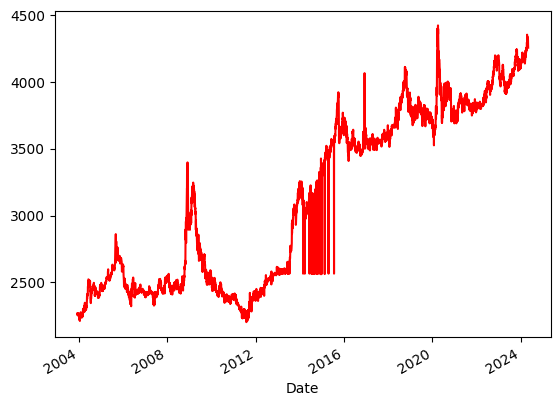

In [66]:
kurs_forecast['Close'].plot(color='red')